# Setup

In [3]:
# Import python packages
import xarray as xr #to read file, alter file
import matplotlib as mpl # plotting
import matplotlib.pyplot as plt # plotting

import numpy as np # only needed to run example plots
import math
import time
from datetime import datetime as dt

# Cartopy imports
import cartopy.crs as ccrs # map projections
import cartopy.feature as cfeature # features (eg. borders, lakes)
from cartopy.util import add_cyclic_point # useful for contourf plots
import cartopy.mpl.ticker as cticker # formatting ticks to be lat/lon

from matplotlib.animation import FuncAnimation #animations
plt.close('all')

IMPORTANT: if there is a download/SSL error when using cartopy features, go to https://www.naturalearthdata.com/downloads/ or urls specified in error and download required files. Extract all files in user/.local/share/cartopy/shapefiles/natural_earth/ and then physical or cultural depending on the feature.

In [4]:
# Specify path and file name
path = 'H:/Summer24-25/' # make sure path uses slashes in //// direction (not '\\\')
filename = 'trends_mad_2005_2015.h0.2014-09.nc'
ds = xr.open_dataset(path+filename) # Read in file as dataset
ds # and get summary

<xarray.Dataset> Size: 312MB
Dimensions:       (time: 1, lev: 88, lat: 192, lon: 288, ilev: 89, nbnd: 2,
                   zlon: 1)
Coordinates:
  * ilev          (ilev) float64 712B 4.5e-06 7.42e-06 1.223e-05 ... 985.0 1e+03
  * lat           (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev           (lev) float64 704B 5.96e-06 9.827e-06 1.62e-05 ... 977.5 992.5
  * lon           (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time          (time) datetime64[ns] 8B 2014-10-01
  * zlon          (zlon) float64 8B 0.0
Dimensions without coordinates: nbnd
Data variables: (12/30)
    BR            (time, lev, lat, lon) float32 19MB ...
    BRCL          (time, lev, lat, lon) float32 19MB ...
    BRO           (time, lev, lat, lon) float32 19MB ...
    BRONO2        (time, lev, lat, lon) float32 19MB ...
    CH4           (time, lev, lat, lon) float32 19MB ...
    CL            (time, lev, lat, lon) float32 19MB ...
    ...            ...
    hyam          (lev) float64 704B ...
    hybi          (ilev) float64 712B ...
    hybm          (lev) float64 704B ...
    time_bnds     (time, nbnd) datetime64[ns] 16B ...
    time_written  (time) |S8 8B ...
    zlon_bnds     (zlon, nbnd) float64 16B ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              trends_mad_2005_2015
    logname:           anderss1
    host:              
    initial_file:      /fmi/datasets/CESM-INPUT/inputdata/atm/cam/inic/fv/f.e...
    topography_file:   /fmi/datasets/CESM-INPUT/inputdata/atm/cam/met/MERRA2/...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Mon Nov 15 12:05:45 2021: ncks -v NOX,NOY,O3,HNO3,CL,C...
    NCO:               netCDF Operators version 4.9.3 (Homepage = http://nco....

In [5]:
# dataset for iterating by time
path = 'H:/Summer24-25/Jupyter/Proper/'
ds_ozone = xr.open_dataset(path+'o3_Amon_CESM2-WACCM_ssp126.nc')
ds_ozone
# variable 'o3' has multiple fill values [...] defined, decoding all values to NaN --> ignore this error if appears

C:\Python312\Lib\site-packages\xarray\conventions.py:289: SerializationWarning: variable 'o3' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 3GB
Dimensions:    (time: 600, plev: 19, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * plev       (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * time       (time) object 5kB 2015-01-15 12:00:00 ... 2064-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    o3         (time, plev, lat, lon) float32 3GB ...
    time_bnds  (time, nbnd) object 10kB ...
    lat_bnds   (lat, nbnd) float32 2kB ...
    lon_bnds   (lon, nbnd) float32 2kB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   735110.0
    branch_time_in_parent:  735110.0
    case_id:                55
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/a75230b6-a50e-4c76-91c1-6367469df58a
    variable_id:            o3
    variant_info:           CMIP6 CESM2 future scenario SSP1-2.6, years 2015-...
    variant_label:          r1i1p1f1

In [6]:
# dataset for using vectors (eg. quiver plots/stream plots)
path = 'H:/Summer24-25/Jupyter/Proper/windfields/'
ds_vectors = xr.open_mfdataset(path+'*WACCM-FV2_historical*.nc')
ds_vectors
# variable 'ua'/'va' has multiple fill values [...] defined, decoding all values to NaN --> ignore this error if appears

C:\Python312\Lib\site-packages\xarray\conventions.py:289: SerializationWarning: variable 'ua' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
C:\Python312\Lib\site-packages\xarray\conventions.py:289: SerializationWarning: variable 'va' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 378MB
Dimensions:    (time: 180, plev: 19, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * plev       (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    ua         (time, plev, lat, lon) float32 189MB dask.array<chunksize=(1, 19, 96, 144), meta=np.ndarray>
    time_bnds  (time, nbnd) object 3kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, nbnd) float64 2kB dask.array<chunksize=(96, 2), meta=np.ndarray>
    lon_bnds   (lon, nbnd) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
    va         (time, plev, lat, lon) float32 189MB dask.array<chunksize=(1, 19, 96, 144), meta=np.ndarray>
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  10950.0
    case_id:                1562
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/953d2903-6c72-49d5-8f1d-229c97d2fe01
    variable_id:            ua
    variant_info:           CMIP6 CESM2 historical ensemble with WACCM6-FV2 (...
    variant_label:          r1i1p1f1

# Useful Functions

**Saving and Opening:**
* plt.savefig('xxx') or fig.savefig('xxx') --> save figure to file, specify file name and file extension (eg. .png, .pdf, .svg)
* datasetName.to_netcdf('fileName.nc') --> save dataset to netcdf file
* animationName.save('fileName.gif', writer='pillow'); --> save animation as gif
* ds = xr.open_mfdataset('my/files/*.nc', parallel=True) --> open multiple files as one dataset, more at https://docs.xarray.dev/en/stable/user-guide/io.html under 'reading'

**Closing:**
* after loading a plot, remember to plt.close(fig) or plt.close(all) or will run out of memory

In [5]:
#adding new variable--> temperature but in celcius not kelvin
ds['T_c'] = ds.T - 273.15 # create new var using old one
ds.T_c.attrs['units'] = 'celcius' # add units for new var
ds.T_c.attrs['standard_name'] = 'temperature in celcius' # add name of new var
ds.T_c # get summary new var

<xarray.DataArray 'T_c' (time: 1, lev: 88, lat: 192, lon: 288)> Size: 19MB
array([[[[392.58078  , 392.58078  , 392.58078  , ..., 392.58078  ,
          392.58078  , 392.58078  ],
         [392.37247  , 392.32944  , 392.28653  , ..., 392.4979   ,
          392.45645  , 392.41428  ],
         [391.85196  , 391.79788  , 391.7429   , ..., 392.02744  ,
          391.96695  , 391.90933  ],
         ...,
         [425.23618  , 425.20798  , 425.17996  , ..., 425.3226   ,
          425.29343  , 425.26462  ],
         [426.5048   , 426.49265  , 426.48056  , ..., 426.54086  ,
          426.52872  , 426.51627  ],
         [427.69968  , 427.69968  , 427.69968  , ..., 427.69968  ,
          427.69968  , 427.69968  ]],

        [[317.03867  , 317.03867  , 317.03867  , ..., 317.03867  ,
          317.03867  , 317.03867  ],
         [317.05746  , 317.0457   , 317.03268  , ..., 317.08847  ,
          317.0795   , 317.06985  ],
         [316.62643  , 316.6149   , 316.60434  , ..., 316.6522   ,
          316.64352  , 316.63467  ],
...
         [ -5.6794434,  -5.6771545,  -5.6748962, ...,  -5.690033 ,
           -5.6834106,  -5.681885 ],
         [ -6.0300293,  -6.033203 ,  -6.036255 , ...,  -6.0234985,
           -6.025299 ,  -6.027527 ],
         [ -6.186676 ,  -6.1867065,  -6.1867065, ...,  -6.187042 ,
           -6.1870117,  -6.186676 ]],

        [[-53.84941  , -53.84941  , -53.84941  , ..., -53.84941  ,
          -53.84941  , -53.84941  ],
         [-54.01271  , -53.985077 , -53.953857 , ..., -54.090607 ,
          -54.06505  , -54.038986 ],
         [-54.26201  , -54.25197  , -54.241623 , ..., -54.289917 ,
          -54.278122 , -54.271484 ],
         ...,
         [ -4.9703674,  -4.979248 ,  -4.988312 , ...,  -4.964203 ,
           -4.9623413,  -4.964508 ],
         [ -5.39032  ,  -5.3969116,  -5.403839 , ...,  -5.383148 ,
           -5.387848 ,  -5.3874207],
         [ -5.748352 ,  -5.7484436,  -5.748413 , ...,  -5.752533 ,
           -5.7521057,  -5.748413 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev      (lev) float64 704B 5.96e-06 9.827e-06 1.62e-05 ... 977.5 992.5
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 8B 2014-10-01
Attributes:
    units:          celcius
    standard_name:  temperature in celcius

In [63]:
# formatting time
date = dt.strptime(str(ds_ozone.time.isel(time=25).values), '%Y-%m-%d %H:%M:%S')
print('original: %s' %date)
formatted_date = date.strftime('%d %B, %Y') #full list of codes at https://docs.python.org/3/library/datetime.html#format-codes
print('formatted: %s' %formatted_date)

original: 2017-02-14 00:00:00
formatted: 14 February, 2017


# Basic Plots

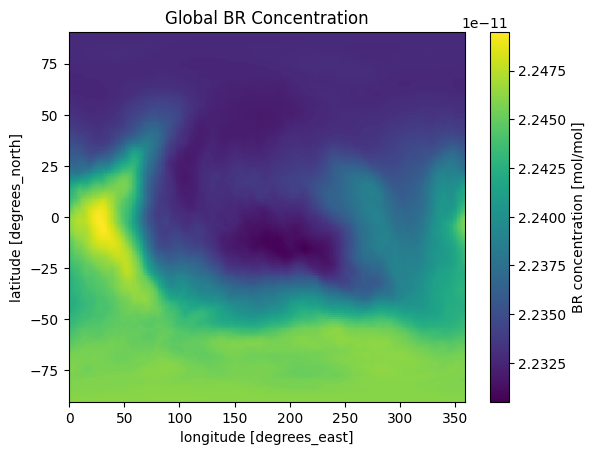

In [7]:
# Use isel (index select) to plot graph using index of coordinates
ds.BR.isel(lev=0, time=0).plot() # plot at first time and pressure level indexes
plt.title('Global BR Concentration') # add title
# To save the plot:
plt.savefig('BR_conc.jpeg') # default img type is png, but can specify by adding .jpeg/pdf/whateverto file name

Text(0.5, 1.0, 'Global Temperatures on 2014-10-01')

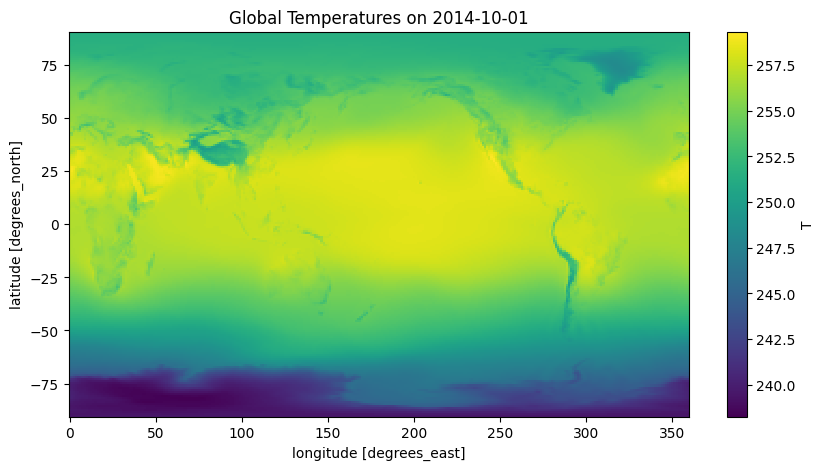

In [8]:
fig = plt.figure(figsize=(10, 5)) # create figure (container) and set size (#pix = size*100)
ax = fig.add_subplot(1, 1, 1) # add a subplot in 1 by 1 grid at pos 1
ds.T.mean(dim='lev').plot(ax=ax) # take average of temperatures at all pressure levels
ax.set_title('Global Temperatures on 2014-10-01')

Text(0.5, 1.0, 'Global Temperatures on 2014-10-01')

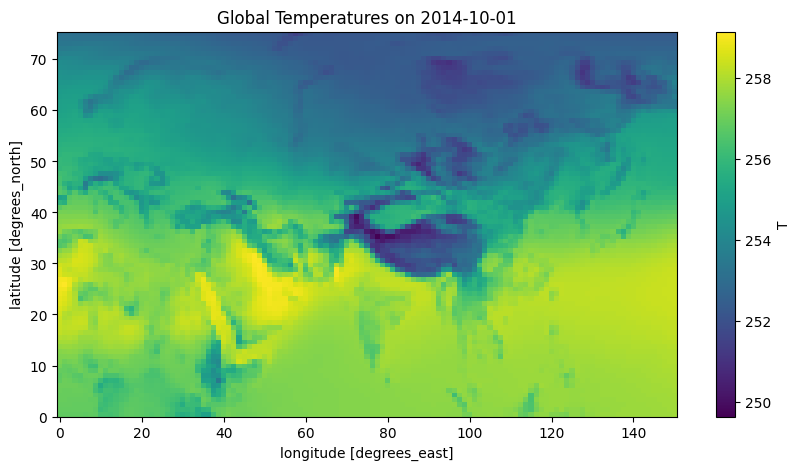

In [14]:
fig, ax = plt.subplots(figsize=(10, 5)) # create figure and an axis (subplot) at same time
ds.T.sel(lon=slice(0,150), lat=slice(0, 75)).mean(dim='lev').plot(ax=ax) # take average of temperatures at all pressure levels, and slice for smaller viewpoint
ax.set_title('Global Temperatures on 2014-10-01')

Text(0.5, 1.0, 'CLO concentration')

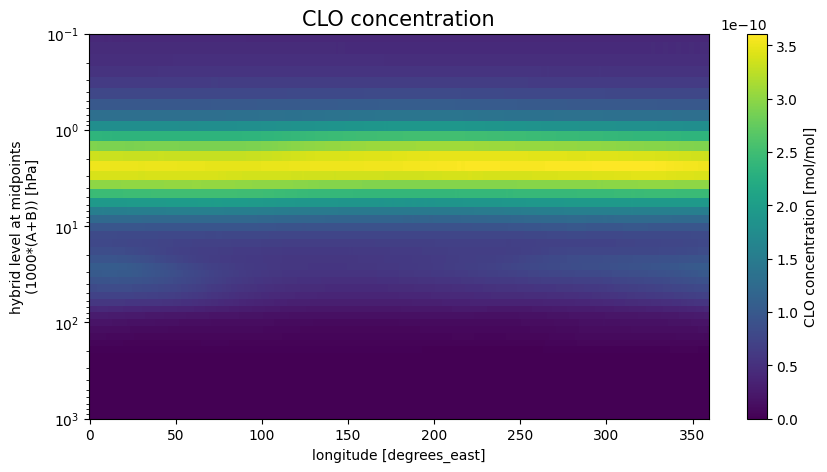

In [10]:
fig,ax = plt.subplots(figsize=[10,5])
cbar_label = ds.CLO.attrs['long_name'] + ' [' + ds.CLO.attrs['units'] + ']'
ds.CLO.isel(time=0).mean(dim='lat').plot(ax=ax, ylim=0.1, cbar_kwargs={'label': cbar_label})
plt.ylim(plt.ylim()[::-1]) # inverting y axis
plt.yscale('log') # using log scale on y axis
ax.set_title('CLO concentration', size=15)

In [35]:
%%timeit
fig=plt.figure(figsize=[15,5])
ax=plt.axes(projection=ccrs.Orthographic())
ds.PSL.plot(ax=ax, transform=ccrs.PlateCarree())
plt.close('all')

70.1 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Using cartopy

IMPORTANT: if there is a download error when using cartopy features, go to https://www.naturalearthdata.com/downloads/ or urls specified in error and download required files. Extract all files in /.local/share/cartopy/shapefiles/natural_earth/ and then physical or cultural depending on the feature.

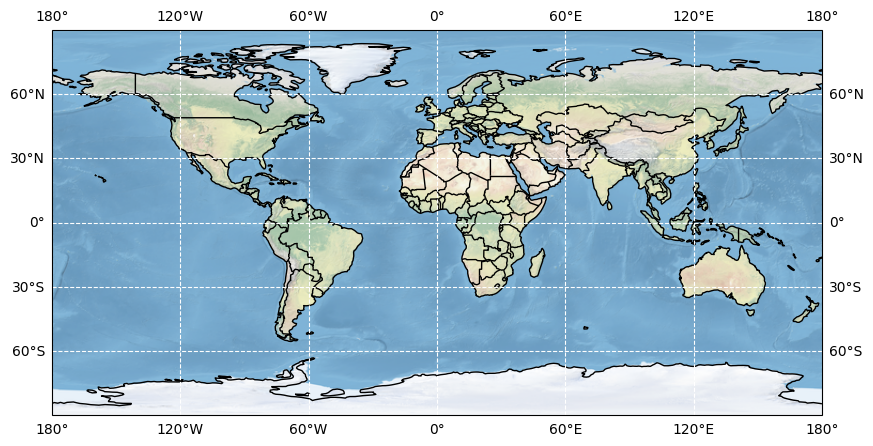

In [36]:
fig=plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.PlateCarree()) # projection wanted
ax.stock_img()
ax.gridlines(color='w', linestyle='--', draw_labels=True) # grid, with longitude/latitude axes labelled
ax.coastlines(color='k') #outline of land
ax.add_feature(cfeature.BORDERS) # divide land into countries

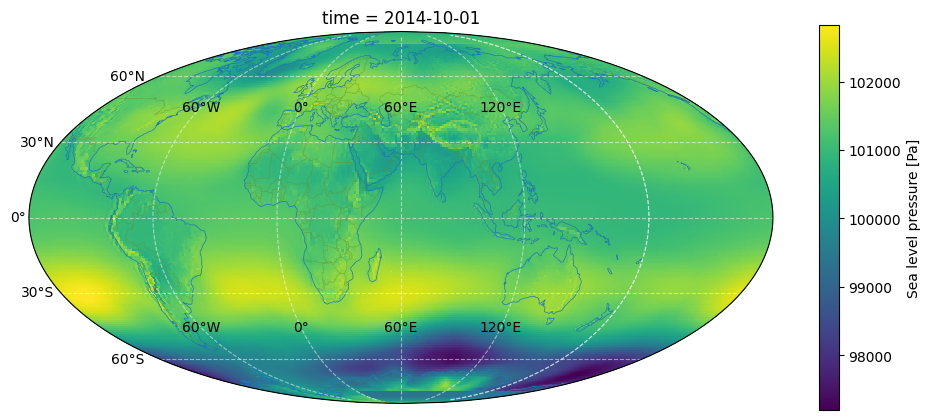

In [37]:
fig = plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=60)) # projection wanted, can also specify central longitude
ax.coastlines(resolution='110m', color='tab:blue', lw=0.5)
ax.add_feature(cfeature.BORDERS, lw=0.5, ec='olivedrab', alpha=0.5);
ax.gridlines(ls='--', color='w', draw_labels=True, alpha=0.5)
ds.PSL.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree()) # projection coords are in (always PlateCarree if in lat/longitude)
plt.show()

Text(0.5, 1.0, 'Concentration of total nitrogen around world')

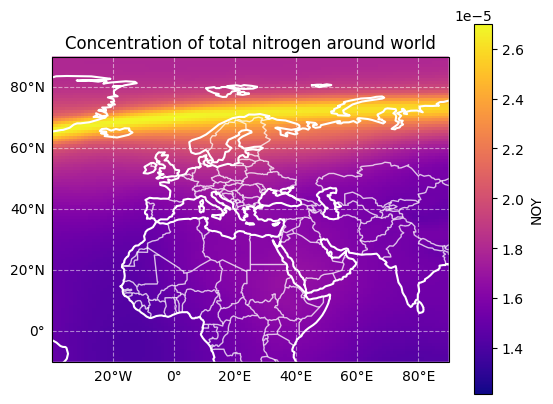

In [38]:
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True, color='w', ls='--', alpha=0.5)
gl.top_labels = False # remove grid labels at top
gl.right_labels = False # and to right of plot

ax.coastlines(resolution='110m', color='w', lw=1.5) # add country outlines
ax.add_feature(cfeature.BORDERS, ec='w', alpha=0.75) #add borders

ax.set_extent([-40,90, -10, 95], crs=ccrs.PlateCarree()) # display smaller area

ds.NOY.isel(time=0).mean(dim='lev').plot(cmap='plasma', ax=ax, transform=ccrs.PlateCarree()) #plot graph

ax.set_title('Concentration of total nitrogen around world')

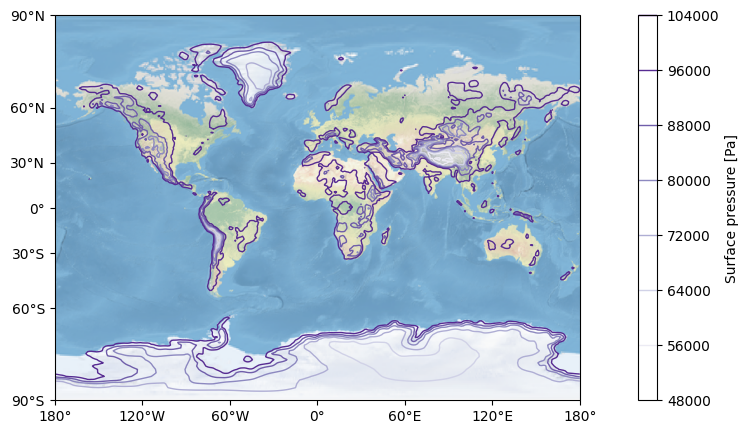

In [39]:
# Contour filled plot
fig=plt.figure(figsize=[15,5])
ax=plt.axes(projection=ccrs.Miller())

data, lons = add_cyclic_point(ds.PS.isel(time=0), coord=ds.lon) #else would be a white line in middle
cbar_label = ds.PS.attrs['long_name'] + ' [' + ds.PS.attrs['units'] + ']'
ax.stock_img()
cs = ax.contour(lons, ds.lat, data, cmap='Purples', levels=7, transform=ccrs.PlateCarree(), linewidths=1)
plt.colorbar(cs, label = cbar_label, ax=ax)

ax.set_xticks([-180,-120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())

ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())

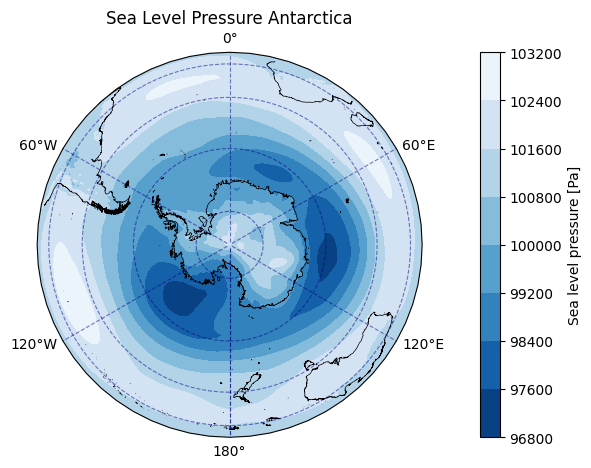

In [40]:
fig=plt.figure(figsize=[15,5])

# Orthographic
ax=plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=-90))


# # Antarctic Stereo - similar to orthographic if use set_extent
# ax=plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.0))
# ax.set_extent([0,360, -90, -30], ccrs.PlateCarree())
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpl.path.Path(verts * radius + center)
# ax.set_boundary(circle, transform=ax.transAxes)


# contour coloured map
data, lons = add_cyclic_point(ds.PSL.isel(time=0), coord=ds.lon) #else would be a white line in middle
cs = ax.contourf(lons, ds.lat, data, transform=ccrs.PlateCarree(), cmap='Blues_r')
plt.colorbar(cs, label = ds.PSL.attrs['long_name'] + ' [' + ds.PSL.attrs['units'] + ']')

# # normal coloured plot
# cs = ds.PSL.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues_r')


ax.set_title('Sea Level Pressure Antarctica')
ax.coastlines(color='k', resolution='10m', lw=0.5)
grid = ax.gridlines(ls='--', color='navy', alpha=0.5, draw_labels=True)

Go to https://scitools.org.uk/cartopy/docs/latest/reference/projections.html for full list of map projections

Times taken to load simple map with coastlines and gridlines in each projection (times taken using %%timeit)
* Circular projections:
* Orthographic= 87.5 ms ± 3.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
* NearsidePerspective= 96.5 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
* Geostationary= 104 ms ± 4.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
* SouthPolarStereo = 1.51 s ± 57.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each
*
* Square/Rectangle projections:
* PlateCarree= 418 ms ± 4.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) --> basic lat/lon
* Mercator= 1.12 s ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* Miller= 1.51 s ± 64.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* LambertCylindrical= 1.31 s ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 
* Oval
* Mollweide= 2.85 s ± 29.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* Robinson= 4.22 s ± 136 ms per loop (mean ± std. dev. of 7 runs, 1 loop each
* EqualEarth = 4.13 s ± 68.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each

# Contour Plots

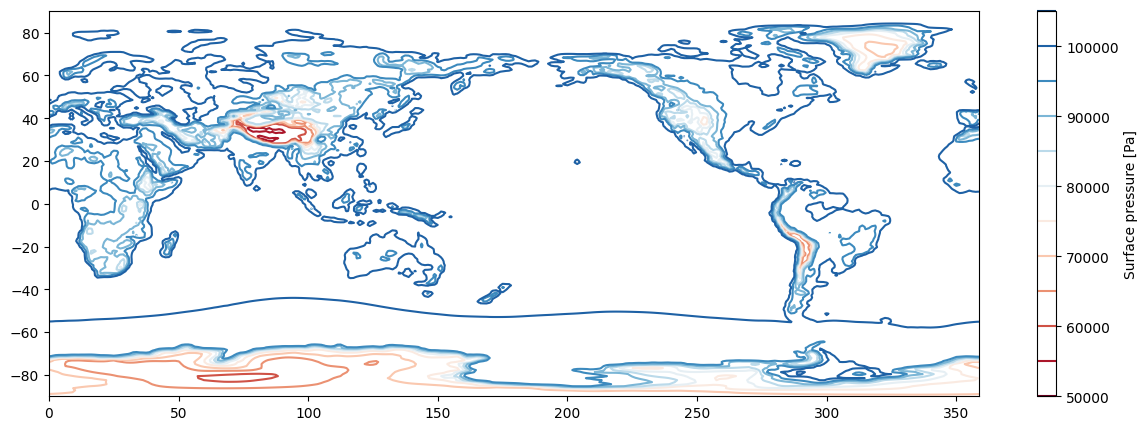

In [42]:
# Contour filled plot
fig=plt.figure(figsize=[15,5])
ax=plt.axes()

cbar_label = ds.PS.attrs['long_name'] + ' [' + ds.PS.attrs['units'] + ']'

cs = ax.contour(ds.lon, ds.lat, ds.PS.isel(time=0), cmap='RdBu', levels=9)
plt.colorbar(cs, label = cbar_label, ax=ax)

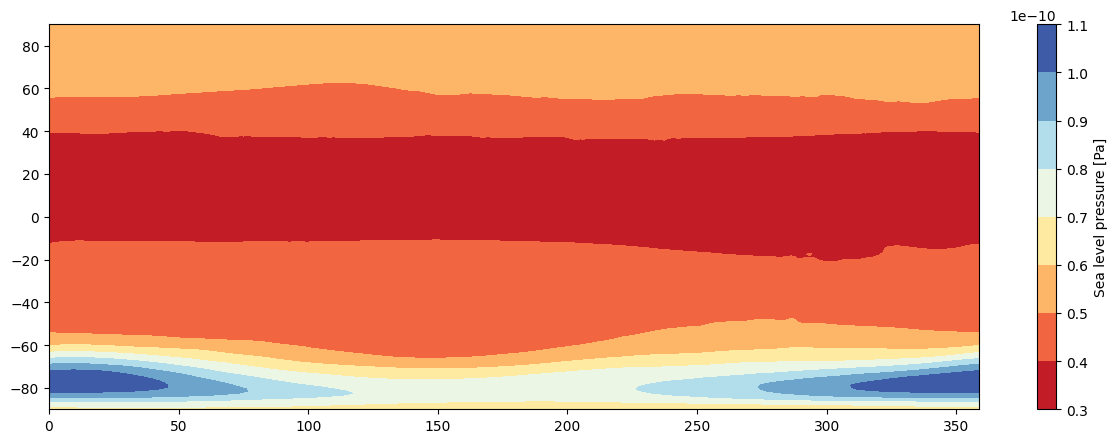

In [43]:
# contour plot
fig=plt.figure(figsize=[15,5])
ax=plt.axes()

cbar_label = ds.PSL.attrs['long_name'] + ' [' + ds.PSL.attrs['units'] + ']'

cs = ax.contourf(ds.lon, ds.lat, ds.CLO.isel(time=0).mean(dim='lev'), cmap='RdYlBu', levels=8)

plt.colorbar(cs, label = cbar_label, ax=ax)

# Subplots

Text(0.5, 1.0, 'Sea-level pressure, 2014-10-01')

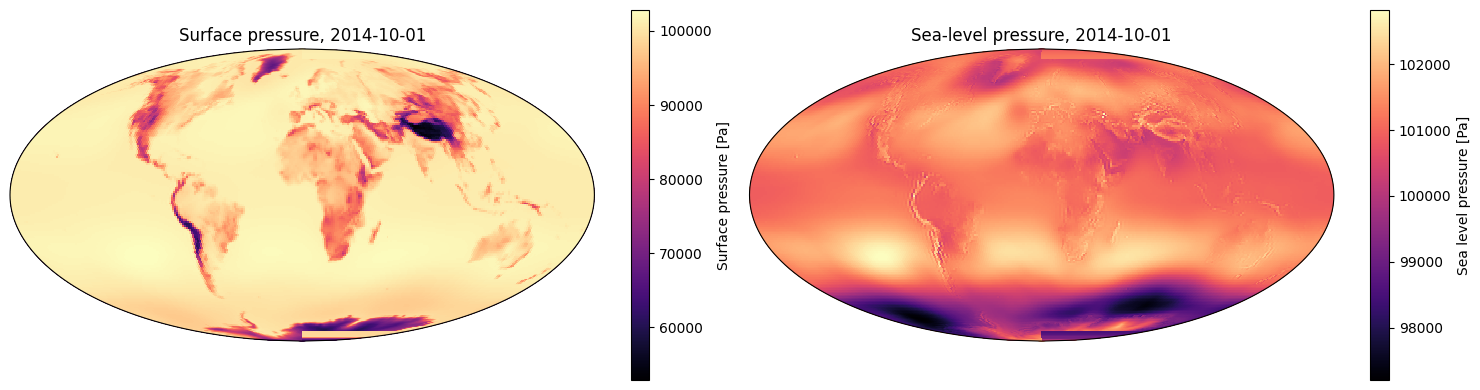

In [44]:
# First example of subplots
fig,(ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=[15,4], layout='tight', subplot_kw=
                              {'projection': ccrs.Mollweide()}) # create container and subcontainers in one line

ds.PS.isel(time=0).plot(ax=ax1, cmap='magma', transform=ccrs.PlateCarree())
ax1.set_title('Surface pressure, 2014-10-01')

ds.PSL.isel(time=0).plot(ax=ax2, cmap='magma', transform=ccrs.PlateCarree())
ax2.set_title('Sea-level pressure, 2014-10-01')

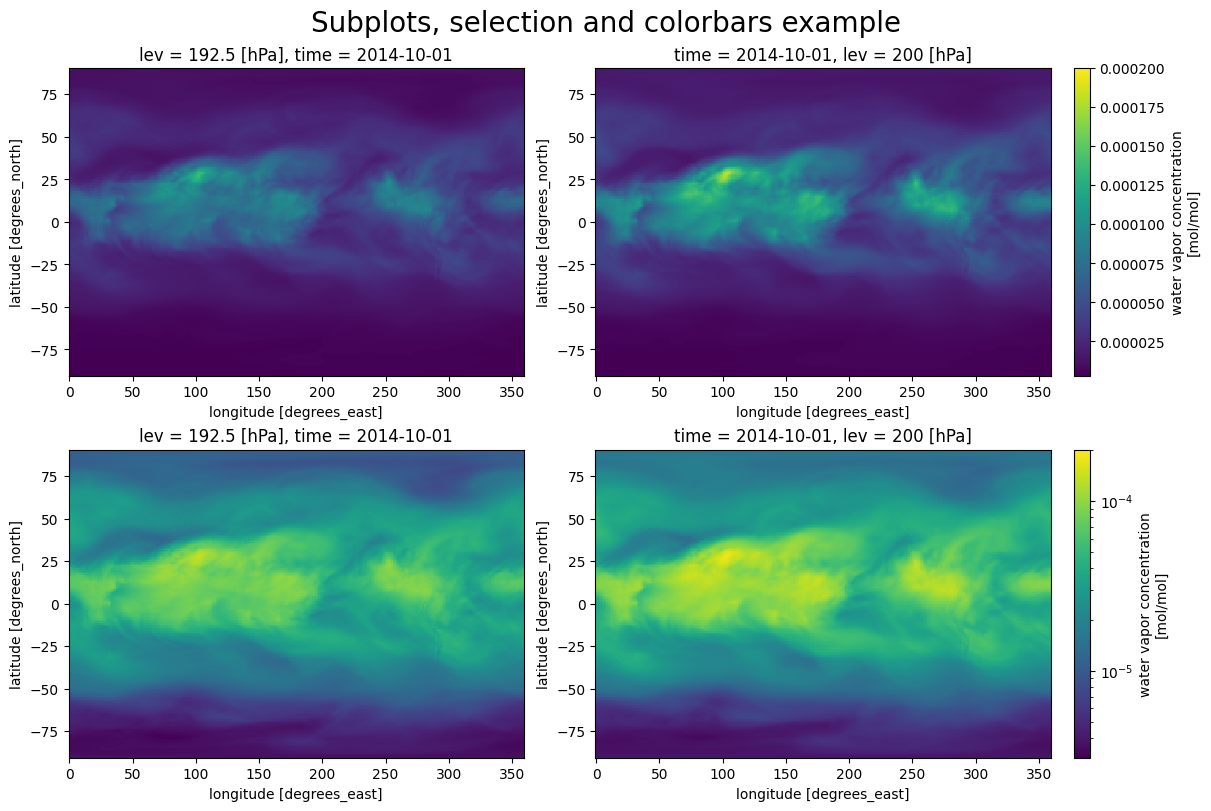

In [45]:
# Second example of subplots
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=[12,8], layout='constrained') # 'constrained' layout prevents overlap of labels
fig.suptitle('Subplots, selection and colorbars example', size=20)

# Normalising colour map between graphs--> can use different types of normalizing
norm = mpl.colors.Normalize(vmax=0.0002)
lognorm = mpl.colors.LogNorm(vmax=0.0002)

# Selection methods
ds.H2O.sel(time='2014-10-30', lev=200, method='nearest').plot(ax=axs[0,0], norm=norm, add_colorbar=False)
                                    # sets lev to closest valid value       # remove first colorbar, as second will be identical

ds.H2O.isel(time=0).interp(lev=200).plot(ax=axs[0,1], norm=norm) # interpolation to set lev to 200

# same but uses lognorm on colorbar
ds.H2O.sel(time='2014-10-30', lev=200, method='nearest').plot(ax=axs[1,0], norm=lognorm, add_colorbar=False)
                                                                            # remove first colorbar, as second will be identical

ds.H2O.isel(time=0).interp(lev=200).plot(ax=axs[1,1], norm=lognorm)


Text(0.5, 0.5, 'e')

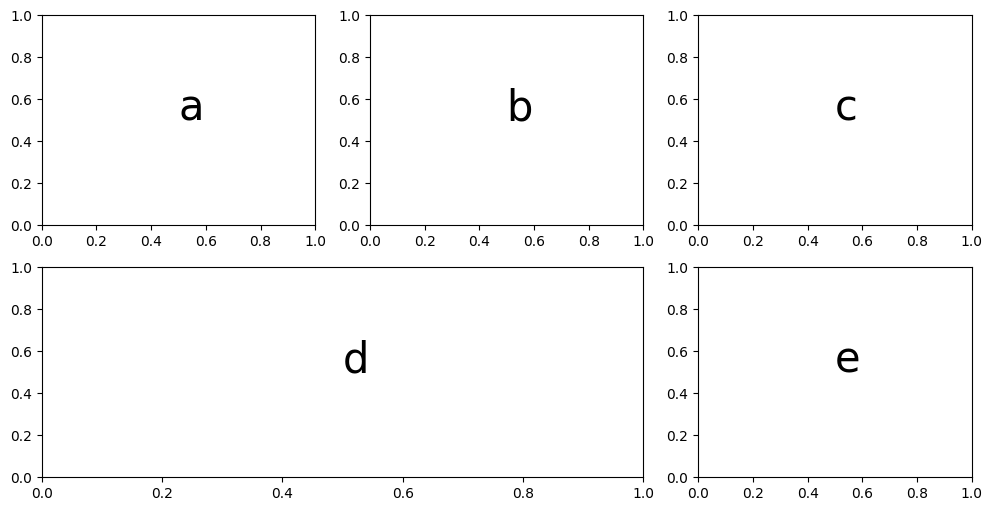

In [46]:
# subplot mosaic: easiest way to make complicated subplot grids
fig = plt.figure(figsize=(12,6))

# mosaic = (
#     [
#         ["a", ".", "b"],
#         ["c", "c", "b"],
#         ["d", "e", "e"],
#     ]
# )
mosaic = '''abc
            dde'''

# mosaic = 'abc;dbc;dee'

axs = fig.subplot_mosaic(mosaic)

axs['a'].annotate('a', xy=[0.5,0.5], size=30)
axs['b'].annotate('b', xy=[0.5,0.5], size=30)
axs['c'].annotate('c', xy=[0.5,0.5], size=30)
axs['d'].annotate('d', xy=[0.5,0.5], size=30)
axs['e'].annotate('e', xy=[0.5,0.5], size=30)

<Axes: >

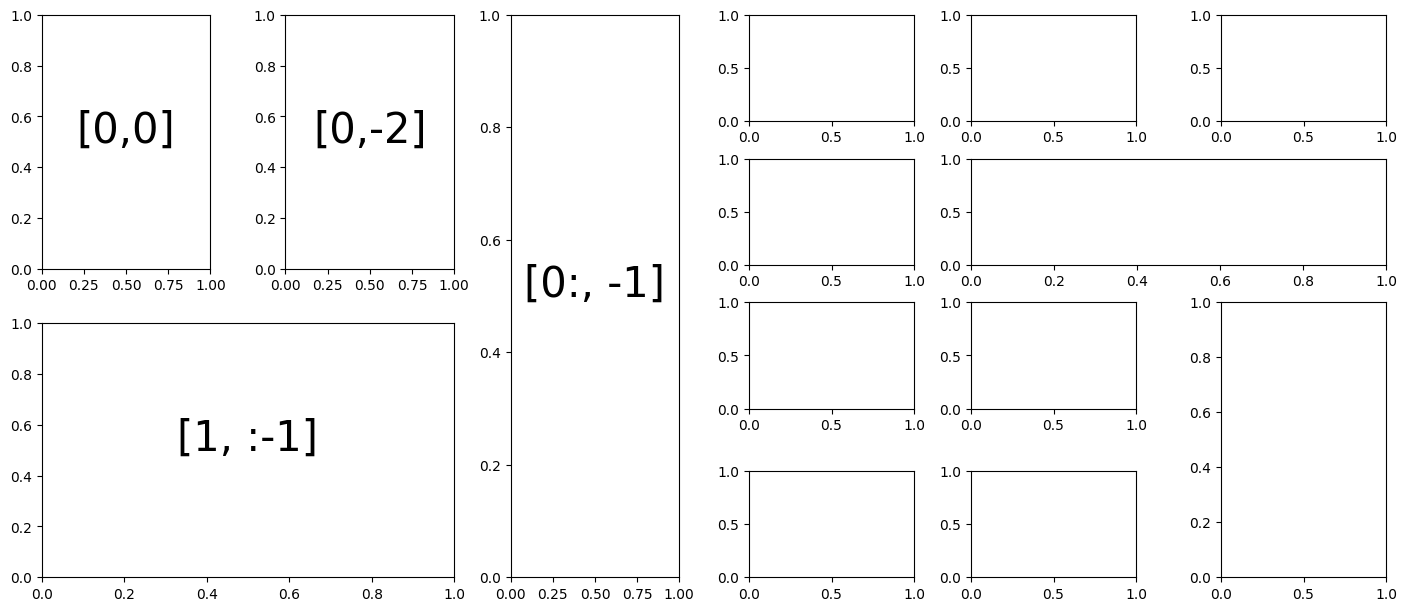

In [47]:
# subfigures
fig = plt.figure(figsize=(14,6), layout='constrained')
left,right = fig.subfigures(nrows=1,ncols=2)

# Gridspec: use for more complex subplots

# use gridspec to create larger plots
grid = left.add_gridspec(ncols=3, nrows=2, figure=left)
ax1 = left.add_subplot(grid[0,0]).annotate('[0,0]', xy=[0.5,0.5], size=30, ha='center')
ax2 = left.add_subplot(grid[0,-2]).annotate('[0,-2]', xy=[0.5,0.5], size=30, ha='center')
ax3 = left.add_subplot(grid[1, :-1]).annotate('[1, :-1]', xy=[0.5,0.5], size=30, ha='center')
ax4 = left.add_subplot(grid[0:, -1]).annotate('[0:, -1]', xy=[0.5,0.5], size=30, ha='center')


# use subplots as a base, then remove some and use gridspec to create larger ones
axs = right.subplots(4,3)
grid = axs[-2,-1].get_gridspec()
for ax in axs[1, 1:]:
    ax.remove()
right.add_subplot(grid[1, 1:])
for ax in axs[-2:, -1]:
    ax.remove()
right.add_subplot(grid[-2:,-1])

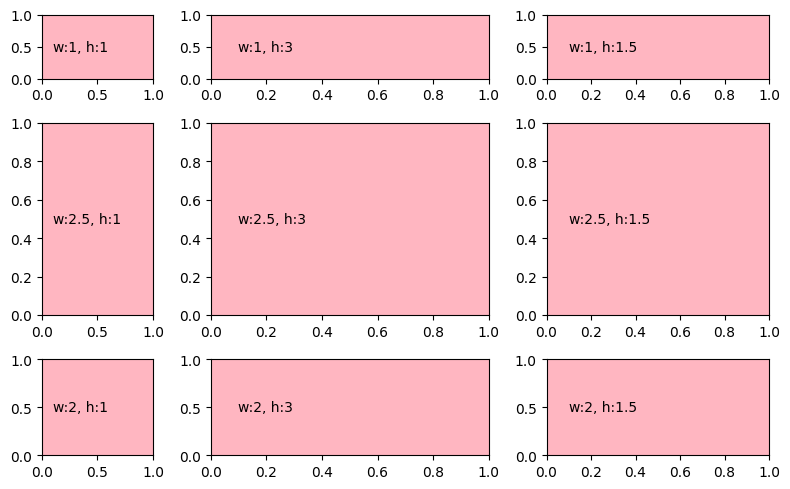

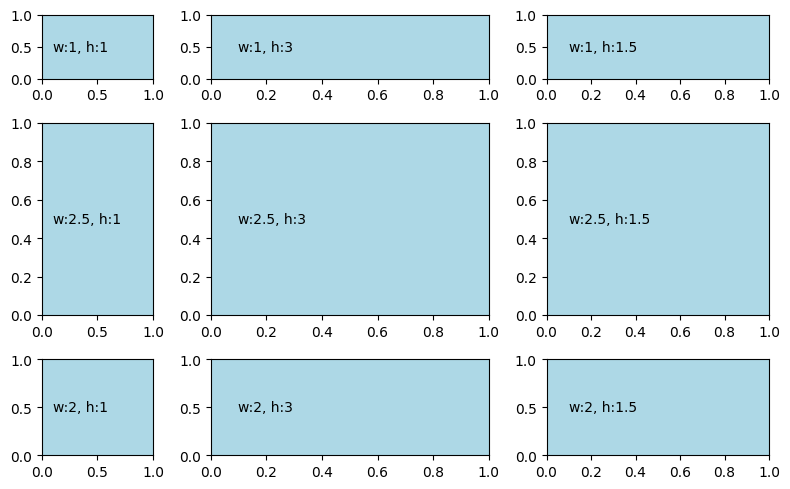

In [48]:
w=[1, 2.5, 2]
h=[1, 3, 1.5]

# More gridspec examples
fig = plt.figure(figsize=(8,5), layout='tight')
grid = fig.add_gridspec(ncols=3, nrows=3, width_ratios=w, height_ratios=h)

for r in range(len(w)):
    for c in range(len(h)):
        ax = fig.add_subplot(grid[r,c])
        ax.annotate('w:%s, h:%s' %(w[r], h[c]), (0.1, 0.5), xycoords='axes fraction', va='center')
        ax.set_facecolor('lightpink')


# same layout as above, but simpler code and ability to easily access axs later
fig, axs = plt.subplots(3,3, gridspec_kw = dict(width_ratios=w, height_ratios=h), figsize=(8,5), layout='tight')
for r, row in enumerate(axs):
    for c, ax in enumerate(row):
        ax.annotate('w:%s, h:%s' %(w[r], h[c]), (0.1, 0.5), xycoords='axes fraction', va='center')
        ax.set_facecolor('lightblue')

CPU times: total: 1.47 s
Wall time: 3.3 s


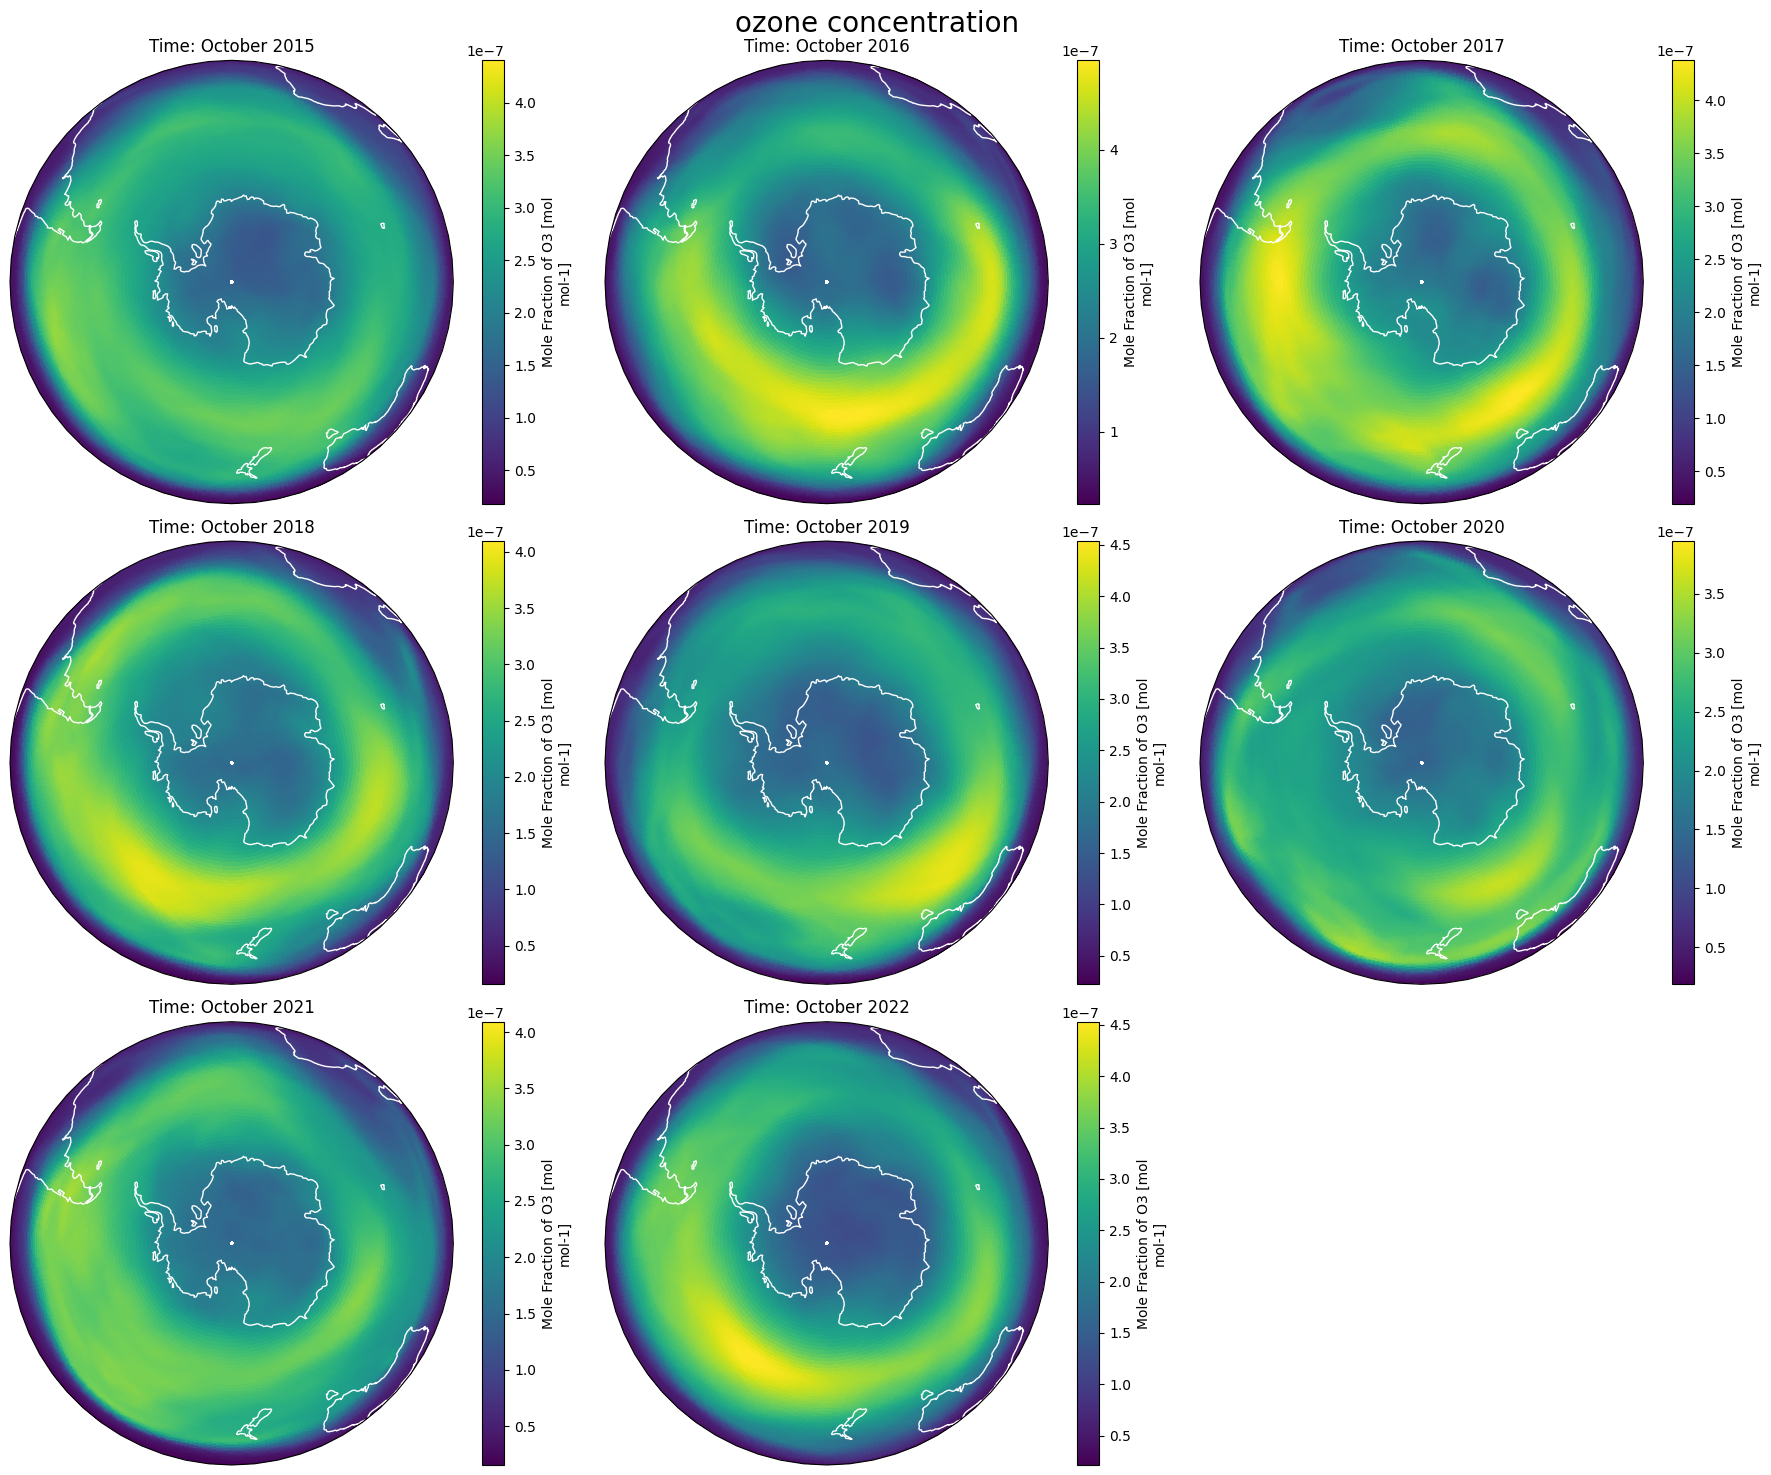

In [49]:
%%time
# variable size of subplot grid
times = np.arange(9,12*8+9, 12) # looking for one plot per year, in the 10th month (index 9) --> using ozone data as it has time variable
row,col = math.ceil(len(times)**0.5), round(len(times)**0.5)

fig, axs = plt.subplots(row,col, figsize=(col*6, row*5), layout='tight', subplot_kw=
                        {'projection': ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=-90)})
fig.suptitle('ozone concentration', size=20)
i = 0
for row in axs:
    for ax in row:
        if i < len(times):
            ds_ozone.o3.isel(time=times[i], plev=9).plot(ax=ax, transform=ccrs.PlateCarree())
            date = dt.strptime(str(ds_ozone.time[times[i]].values), '%Y-%m-%d %H:%M:%S')
            formatted = date.strftime('%B %Y')
            ax.set_title('Time: %s' %formatted)
            ax.coastlines(resolution='110m', color='w')
            i += 1
        else:
            ax.remove()

fig.savefig('vary_subplots_example.png')

# Miscellaneous Plots

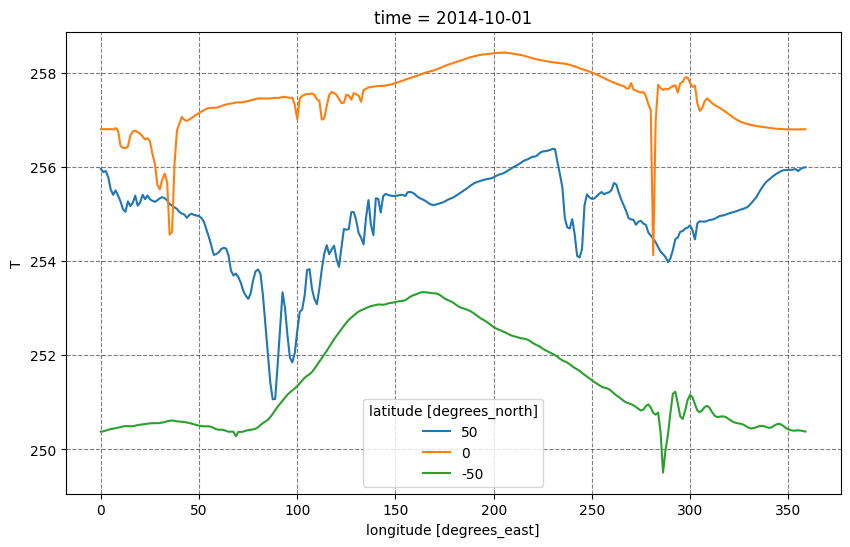

In [50]:
fig,ax = plt.subplots(figsize=[10,6])
       # taking average of levels, interpolating for latitude
ds.T.isel(time=0).mean(dim='lev').interp(lat=[50,0,-50]).plot(hue='lat', ax=ax, label=[50,0,-50])
ax.grid(c='k', ls='--', alpha=0.5)

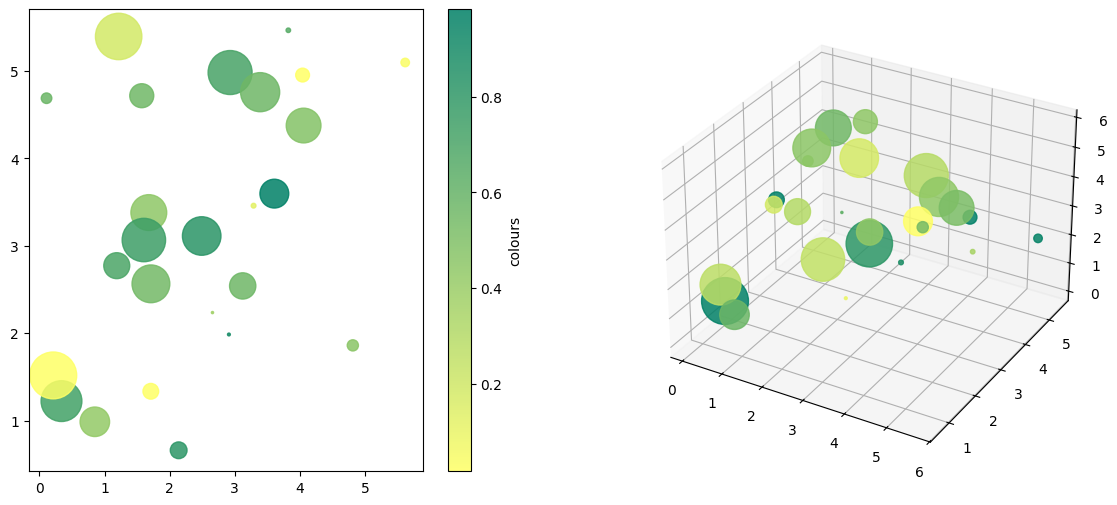

In [51]:
fig = plt.figure(figsize=[14,6])

# setting up test data
rng = np.random.default_rng()
N_points = 25

x = rng.random(N_points) * 6
y = rng.random(N_points) * 5 + 0.5
z = rng.random(N_points) * 6
area = 1.5*(30 * np.random.rand(N_points))**2  # 
c = rng.random(N_points)

# creating left plot (2D scatter)
ax_2D = fig.add_subplot(1,2,1)
left = ax_2D.scatter(x, y, s=area, c=c, alpha=0.85, cmap='summer_r') # adding '_r' to any colormap will reverse it

#creating right plot (3D scatter)
ax_3D = fig.add_subplot(1,2,2, projection='3d')
right = ax_3D.scatter(x, y, z, s=area, c=c, cmap='summer', alpha=0.85)

plt.colorbar(left, label='colours', ax=ax_2D)

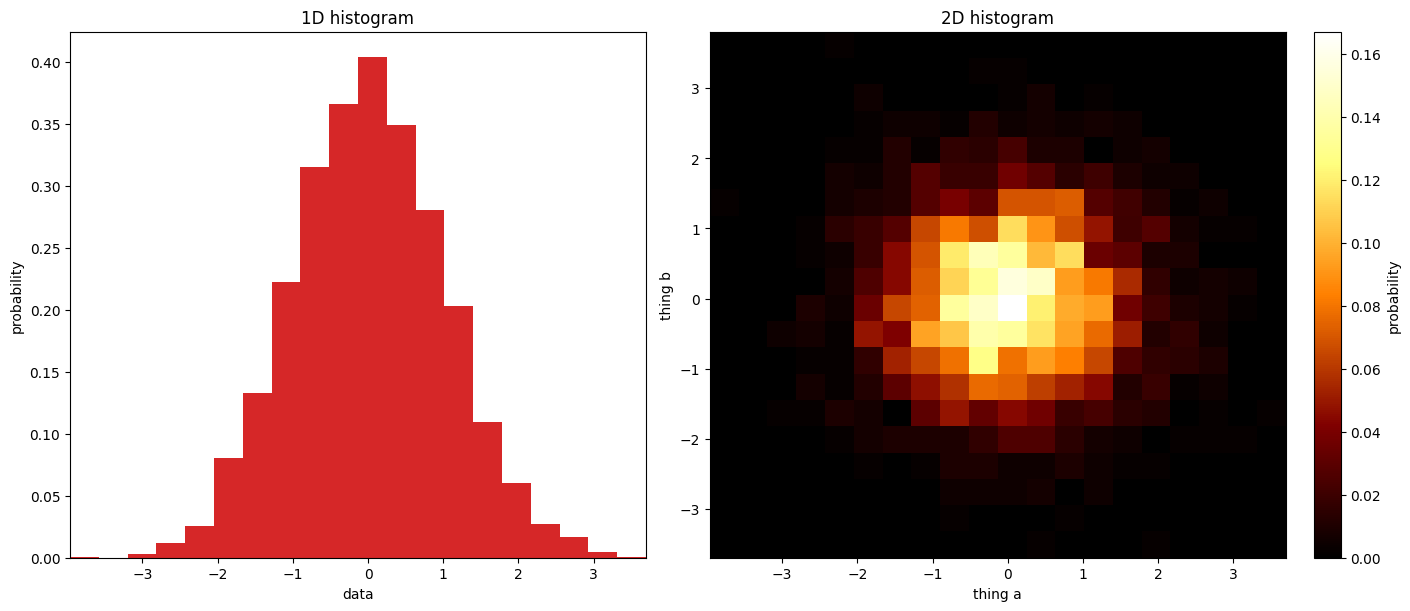

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6), layout='constrained', sharex=True)

# setting up data
npts = 3000; nbins = 20; 
x = np.random.normal(size=npts)
y = np.random.normal(size=npts)

# 1d histogram
ax1.hist(x, bins=nbins, density=True, color='tab:red')
ax1.set_title('1D histogram')
ax1.set_xlabel('data')
ax1.set_ylabel('probability')

# 2d histogram
two_d = ax2.hist2d(x, y, bins=nbins, density=True, cmap='afmhot')
ax2.set_title('2D histogram')
ax2.set_xlabel('thing a')
ax2.set_ylabel('thing b')
cb = fig.colorbar(two_d[3], ax=ax2, location='right', label='probability')

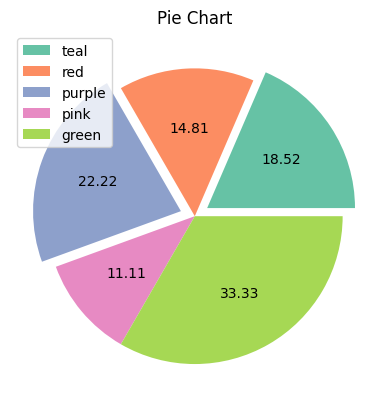

In [53]:
parts = [0.5,0.4,0.6,0.3,0.9]
colors=plt.cm.Set2.colors
labels = ['teal', 'red', 'purple', 'pink', 'green']
plt.pie(parts, colors=colors, labels=labels, labeldistance=None, explode=[0.1,0,0.1,0,0], autopct='%.2f')
plt.title('Pie Chart')
plt.legend(loc='upper left')

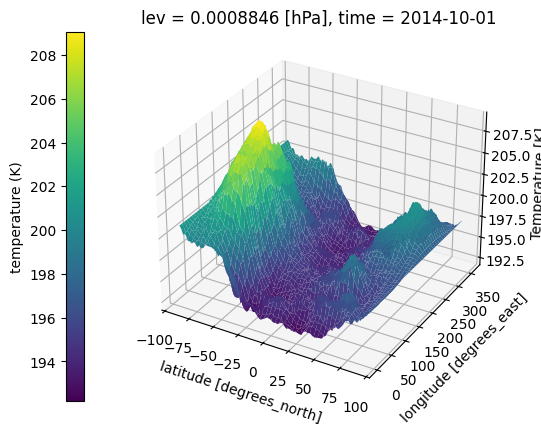

In [54]:
Temp =ds.T.isel(time=0, lev=10)
plot = Temp.T.plot.surface(cmap='viridis', add_colorbar=False)
plt.colorbar(plot, location='left', label='temperature (K)')

# Further Customisation

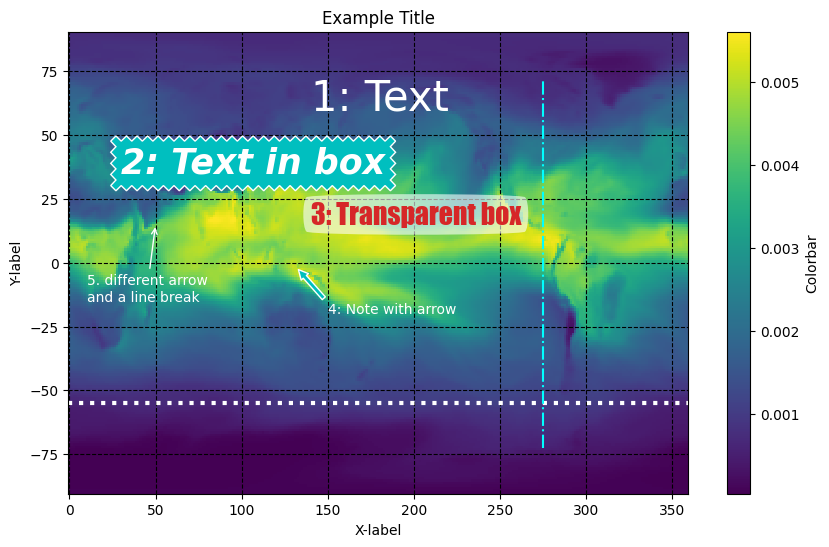

In [55]:
# Customising labels and annotating
fig, ax = plt.subplots(1,1, figsize=[10,6])
ds.H2O.isel(time=0).mean(dim='lev').plot(ax=ax)
ax.set(title='Example Title', ylabel='Y-label', xlabel='X-label')
ax.collections[-1].colorbar.set_label('Colorbar')

# 1. text
plt.text(x=140, y=60, s='1: Text', color='white', size=30)
# 2. text in box
plt.text(x=30, y=35, s='2: Text in box', color='w', weight='demi', style='italic', size=25, 
        bbox=dict(facecolor='c', edgecolor='w', boxstyle='sawtooth'))
# 3. transparent box
plt.text(x=140, y=15, s='3: Transparent box', size=20, font='fantasy', c='tab:red', 
        bbox=dict(fc='w', ec='none', alpha=0.6, boxstyle='round4')) # alpha controls transparency
# 4. note with arrow
ax.annotate('4: Note with arrow', xy=(132,-2), xytext=(150,-20), c='w', # xy=point of arrow, if xy=xytext, arrow disappears
            arrowprops=dict(fc='c', ec='w', shrink=0.05, width=3, headwidth=7, headlength=7))
# 5. different arrow style
ax.annotate('5. different arrow\nand a line break', xy=(50, 15), xytext=(10,-15), c='w', 
           arrowprops=dict(arrowstyle='->', color='w'))

# lines
ax.axhline(y=-55, c='w', linestyle=':', linewidth='3') #horizontal line, white, dotted line style
ax.axvline(x=275, ymin=0.1, ymax=0.9, c='cyan',ls='-.') #vertical line, starts at 10%, ends at 90%, cyan dot dash style
ax.grid(True, c='k', ls='--')

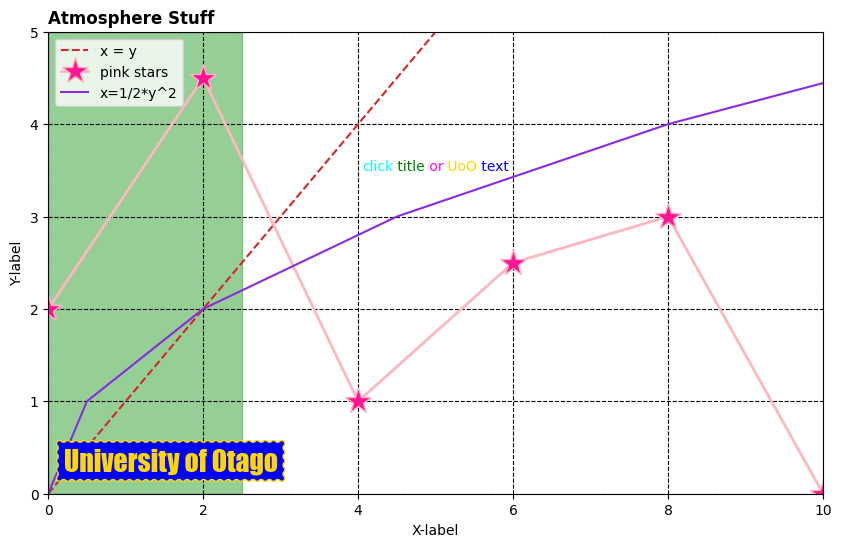

In [56]:
# Customising labels and annotating
fig, ax = plt.subplots(1,1, figsize=(10,6))

title = ax.set_title('Atmosphere Stuff', weight='bold', loc='left')
title.set_url('https://www.physics.otago.ac.nz/research/atmosphere/index.html')

ax.set(ylabel='Y-label', ylim=(0,5), xlabel='X-label', xlim=(0, 10) )
ax.grid(True, c='k', ls='--')

ax.axline([0,0], slope=1, color='tab:red', ls='--', label='x = y')

x = np.arange(0,11,2)
y = [2, 4.5, 1, 2.5, 3, 0]
ax.plot(x,y, '-*', lw=2, ms=20, mfc='deeppink', c='lightpink', label='pink stars')

y = np.arange(6)
x= 0.5*(y**2)
ax.plot(x,y, c='blueviolet', label='x=1/2*y^2')

ax.legend(loc='upper left')

rect = plt.Rectangle(xy=[0,0], width=2.5, height=5, alpha=0.5, color='tab:green')
ax.add_patch(rect)

t = ax.text(4.05, 3.5, 'click', c='cyan')
t = ax.annotate(' title', xycoords=t, xy=[1,0], verticalalignment='bottom', c='green')
t = ax.annotate(' or', xycoords=t, xy=[1,0], va='bottom', c='magenta')
t = ax.annotate(' UoO', xycoords=t, xy=[1,0], va='bottom', c='gold')
t = ax.annotate(' text', xycoords=t, xy=[1,0], va='bottom', c='blue')

link = plt.text(x=0.02, y=0.05, s='University of Otago', transform=ax.transAxes, 
        color='gold', weight='bold', font='fantasy', size=20, 
        bbox=dict(fc='blue', ec='gold', boxstyle='roundtooth'))
link.set_url('https://www.otago.ac.nz/')
fig.savefig('test.svg') #links in images only work in svg format

# Plotting Vectors

## Quiver Plots

CPU times: total: 46.9 ms
Wall time: 147 ms


Text(0.01, -0.1, 'May 2008')

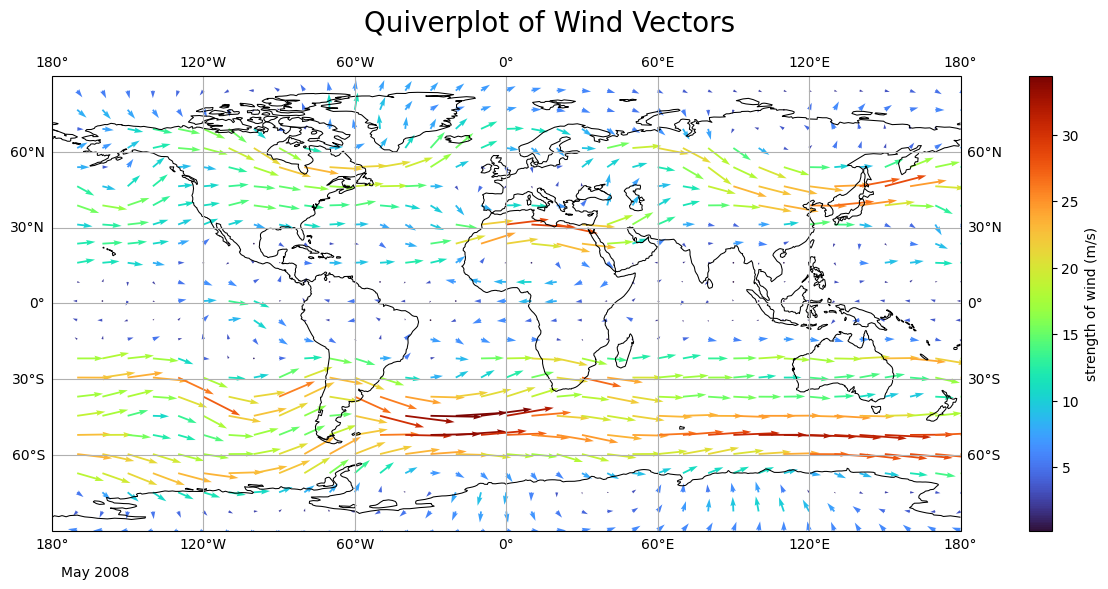

In [7]:
%%time
n=100
p=6

fig = plt.figure(figsize=(14,6), layout='tight')
ax = plt.axes(projection=ccrs.PlateCarree())
u = ds_vectors.ua.isel(plev=p, time=n)[::4, ::4] # slicing to get every 4th element
v = ds_vectors.va.isel(plev=p, time=n)[::4, ::4] # which loads faster + renders fewer arrows

fig.suptitle('Quiverplot of Wind Vectors', size=20)

# plain coloured arrows
# qv = ax.quiver(u.lon, u.lat, u, v, color='darkblue', scale=600, width=0.002, transform=ccrs.PlateCarree())

# arrows coloured by strength
windspeed = (v**2 + u**2)**0.5
qv = ax.quiver(u.lon, u.lat, u, v, windspeed, cmap='turbo', scale=600, width=0.002, transform=ccrs.PlateCarree())
fig.colorbar(qv, ax=ax, label='strength of wind (m/s)')

ax.coastlines(color='k', lw=0.75)
ax.gridlines(draw_labels=True)

date = dt.strptime(str(ds_vectors.time[n].values), '%Y-%m-%d %H:%M:%S')
formatted = date.strftime('%B %Y')
ax.text(0.01, -0.1, formatted, ha='left', transform=ax.transAxes)

## Streamlines

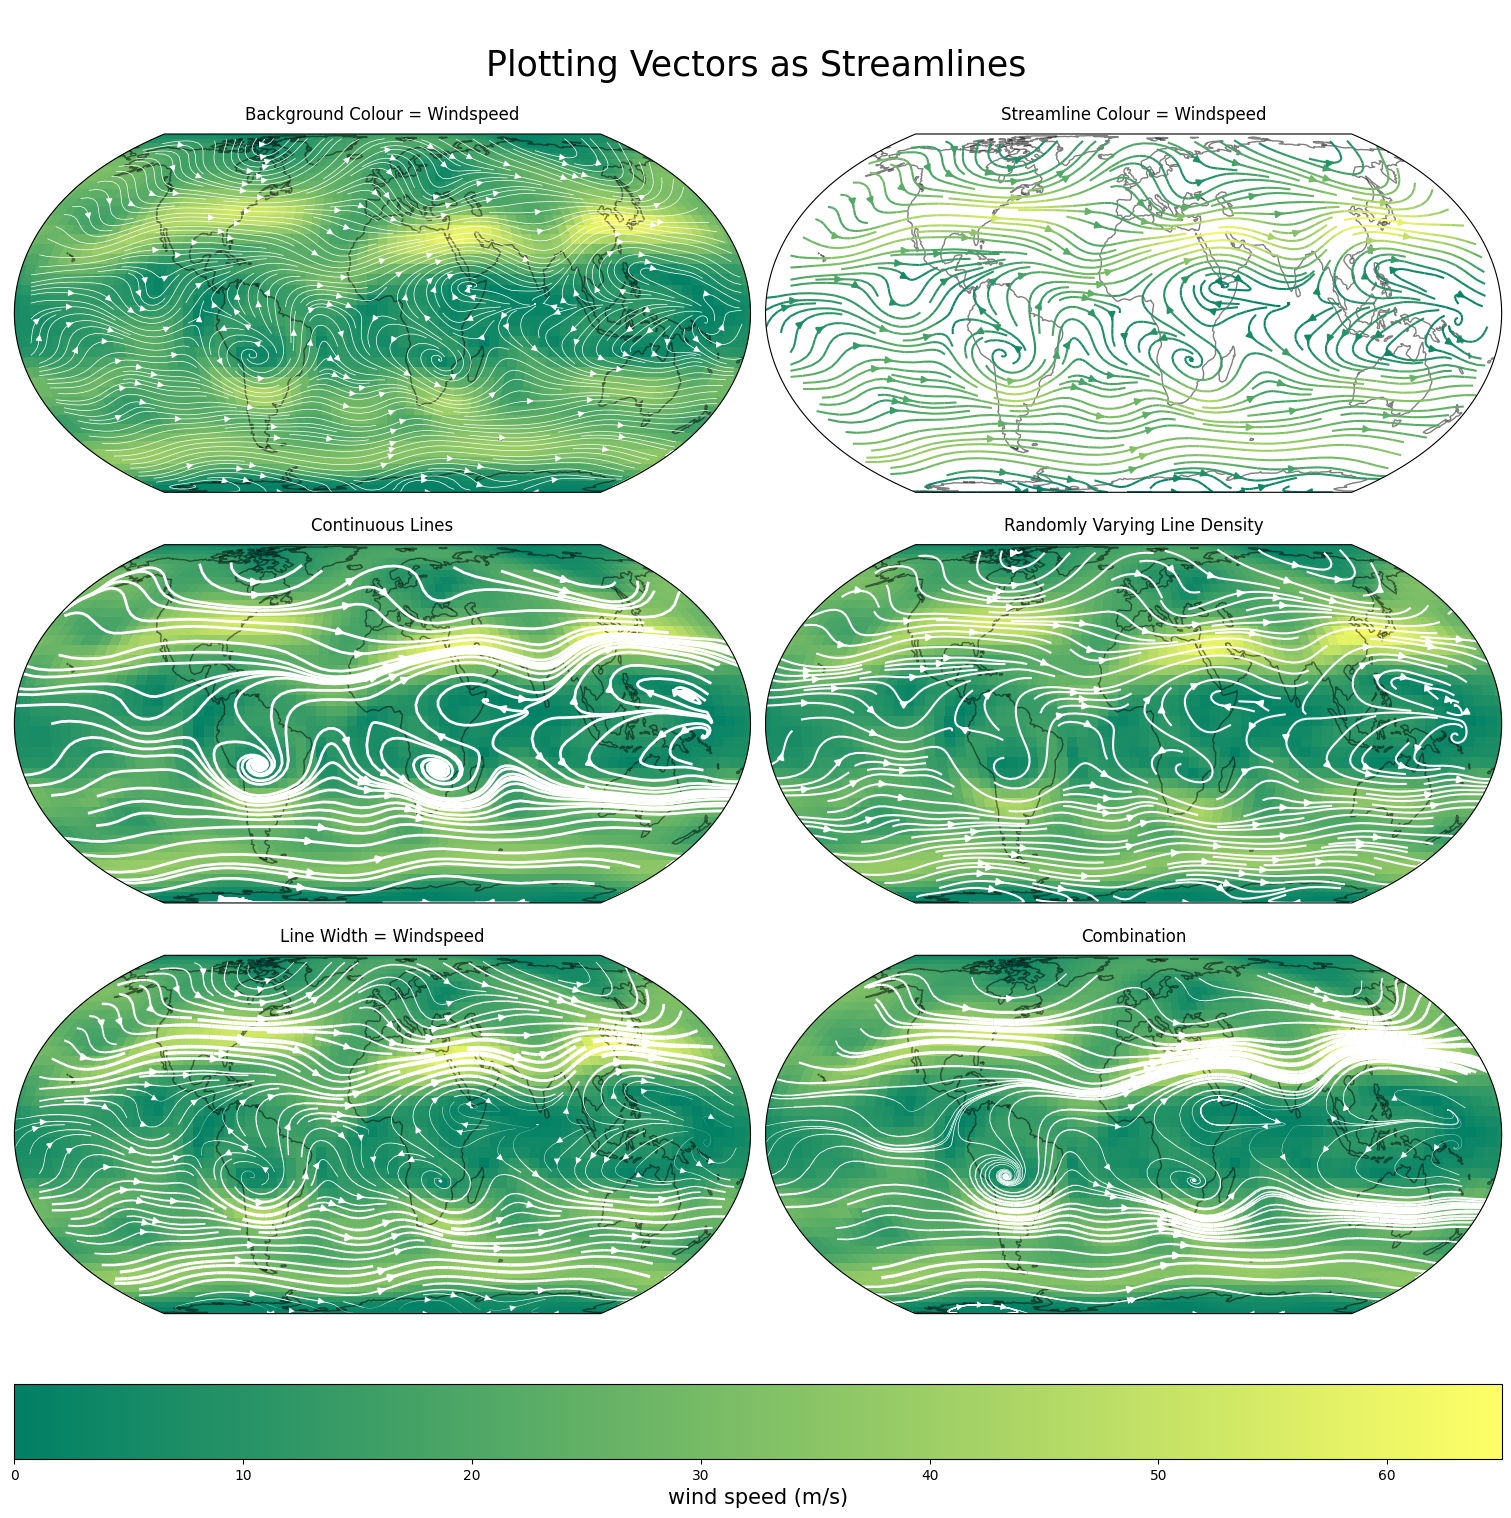

In [15]:
# setting up variables
ntime = -1
pressure = 9
cmap = 'summer'
norm = mpl.colors.Normalize(vmin=0, vmax=65)

u = ds_vectors.ua.isel(plev=pressure, time=-1)[::2, ::2]
v = ds_vectors.va.isel(plev=pressure, time=-1)[::2, ::2]
windspeed = (u**2 + v**2)**0.5

fig, axs = plt.subplots(3,2, figsize=(15,15), layout='constrained', subplot_kw={'projection': ccrs.EqualEarth()})
fig.suptitle('\nPlotting Vectors as Streamlines', size=25)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs, location='bottom')
cbar.set_label(label="wind speed (m/s)", size=15)

# variations of streamplots

# background colour
windspeed.plot(ax=axs[0,0], cmap=colmap, transform=ccrs.PlateCarree(), norm=norm, add_colorbar=False)
axs[0,0].streamplot(u.lon, u.lat, u, v, transform=ccrs.PlateCarree(), density=3, color='w', linewidth=0.5)
axs[0,0].coastlines(color='k', alpha=0.5)
axs[0,0].set_title('Background Colour = Windspeed', pad=10)


# stream line colour
strm = axs[0,1].streamplot(u.lon, u.lat, u, v, transform=ccrs.PlateCarree(), density=2, color=windspeed.values, cmap=colmap)
axs[0,1].coastlines(color='k', alpha=0.5)
axs[0,1].set_title('Streamline Colour = Windspeed', pad=10)


# with continuous lines
windspeed.plot(ax=axs[1,0], cmap=colmap, transform=ccrs.PlateCarree(), norm=norm, add_colorbar=False)
axs[1,0].streamplot(u.lon, u.lat, u, v, transform=ccrs.PlateCarree(), color='w', density = 0.7, linewidth=2, broken_streamlines=False)
axs[1,0].coastlines(color='k', alpha=0.5)
axs[1,0].set_title('Continuous Lines', pad=10)


# line density--> doesn't represent wind speed!!
windspeed.plot(ax=axs[1,1], cmap=colmap, transform=ccrs.PlateCarree(), norm=norm, add_colorbar=False)
axs[1,1].streamplot(u.lon, u.lat, u, v, transform=ccrs.PlateCarree(), density=[1,3], color='w', linewidth=1.5)
axs[1,1].coastlines(color='k', alpha=0.5)
axs[1,1].set_title('Randomly Varying Line Density', pad=10)


# line width
windspeed.plot(ax=axs[2,0], cmap=colmap, transform=ccrs.PlateCarree(), norm=norm, add_colorbar=False)
lw = 4* (windspeed.values / windspeed.values.max())
axs[2,0].streamplot(u.lon, u.lat, u, v, transform=ccrs.PlateCarree(), color='w', linewidth=lw, density = 2)
axs[2,0].coastlines(color='k', alpha=0.5)
axs[2,0].set_title('Line Width = Windspeed', pad=10)


#combination of displays
windspeed.plot(ax=axs[2,1], cmap=colmap, transform=ccrs.PlateCarree(), norm=norm, add_colorbar=False)
lw = 4* (windspeed.values / windspeed.values.max())
axs[2,1].streamplot(u.lon, u.lat, u, v, transform=ccrs.PlateCarree(), color='w', linewidth=lw, density = 0.75, broken_streamlines=False)
axs[2,1].coastlines(color='k', alpha=0.5)
axs[2,1].set_title('Combination', pad=10)


fig.savefig("streamlines_example") #save for higher quality image

# Animating Plots

CPU times: total: 14.2 s
Wall time: 16.8 s


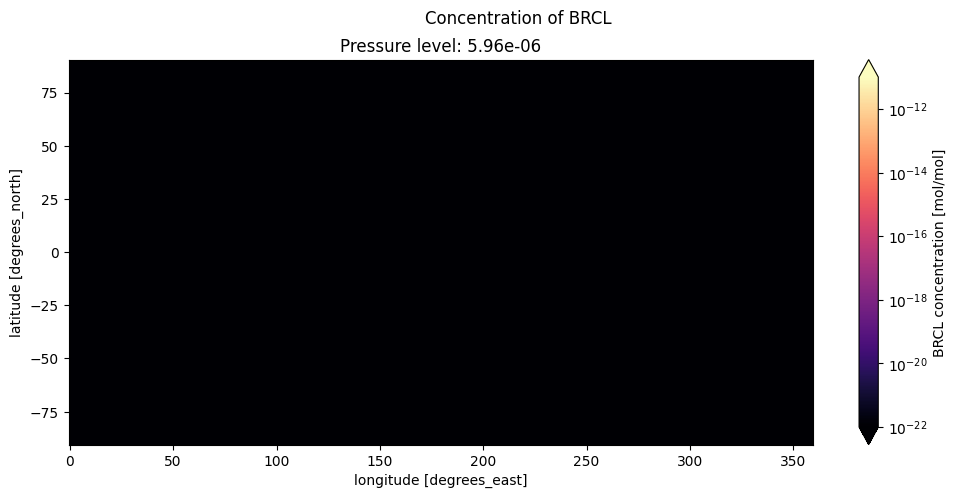

In [59]:
%%time

# Good animation without coastlines

fig,ax = plt.subplots(figsize=(12,5))
fig.suptitle('Concentration of BRCL', ha='center')

norm = mpl.colors.LogNorm(vmin=10**-22, vmax=10**-11) # the range of colorbar--> figure out through looking at data
ds.BRCL.isel(lev=0,time=0).plot(ax=ax, cmap='magma', norm=norm, extend='both') # plot initial figure to obtain colorbar from

def animate(num): # function to update each frame
    ax.clear() # clear previous plots
    ds.BRCL.isel(lev=num,time=0).plot(ax=ax, cmap='magma', norm=norm, extend='both', add_colorbar=False) # draw new plot
    ax.set_title('Pressure level: %.4g' %ds.lev.isel(lev=num)['lev'].values)

anim = FuncAnimation(fig, animate, frames=ds.BRCL.lev.size, interval=200) # frames = number frames to draw, interval = speed of anim

anim.save('brcl_norm.gif', writer='pillow'); # save animation to same folder as jupyter file

# 18.8 s ± 717 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

CPU times: total: 20.7 s
Wall time: 21.1 s


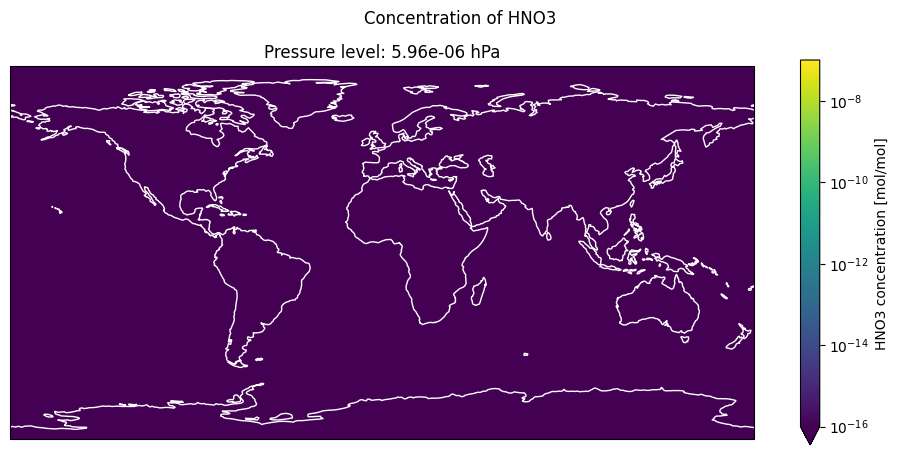

In [60]:
%%time
# contourf animation with cartopy coastlines

fig = plt.figure(figsize=(12,5))
ax=plt.axes(projection=ccrs.PlateCarree())

fig.suptitle('Concentration of HNO3', ha='center')

norm = mpl.colors.LogNorm(vmin=10**-16, vmax=10**-7) # normalise so frames share same range of colors -> figure range through testing
ds.HNO3.isel(lev=0,time=0).plot(ax=ax, norm=norm, transform=ccrs.PlateCarree()) # initial plot, creates colorbar

def animate(num): # animation func updates for each frame
    ax.clear() # clear previous frame
    data, lons = add_cyclic_point(ds.HNO3.isel(time=0, lev=num), coord=ds.lon) # tells map that longitude is cyclic--> stops white bar appearing
    cs = ax.contourf(lons, ds.lat, data, norm=norm, levels=10, transform=ccrs.PlateCarree()) # draw plot
    ax.coastlines(color='w') # draw coastlines
    ax.set_title('Pressure level: %.4g hPa' %ds.lev.isel(lev=num)['lev'].values) # title frame with current pressure level


anim = FuncAnimation(fig, animate, frames=ds.HNO3.lev.size, interval=200, repeat=True) # frames= number frames in anim, interval = frame per time

anim.save('HNO3_cartopy.gif', writer='pillow'); # save animation to same folder as jupyter file

# 21.6 s ± 318 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

CPU times: total: 1min 34s
Wall time: 1min 48s


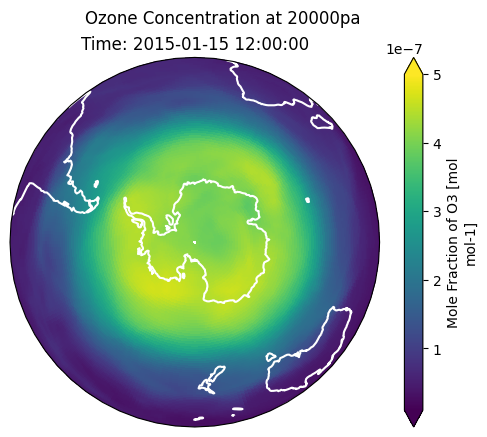

In [78]:
%%time
## normalised colours + coasts
pressure = 20000 # req. pressure level in Pa --> 200hPa
norm = mpl.colors.Normalize(vmin=(10**-8), vmax=(5*10**-7))
frames = ds_ozone.o3.time.size

fig = plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=-90))

fig.suptitle("Ozone Concentration at %spa" %pressure)
ds_ozone.o3.isel(time=0).sel(plev=pressure).plot(ax=ax, transform=ccrs.PlateCarree(), norm=norm, extend='both')
def animate(num):
    ax.clear()
    ds_ozone.o3.isel(time=num).sel(plev=pressure).plot(ax=ax, transform=ccrs.PlateCarree(), norm=norm, extend='both', add_colorbar=False)
    ax.set_title("Time: %s" %(ds_ozone.o3.isel(time=num)['time'].values))
    ax.coastlines(color='w', lw=1.5, resolution='110m')
    

anim = FuncAnimation(fig, animate, interval=200, frames=frames)
anim.save("o3_normCoasts_full.gif", writer='pillow')

CPU times: total: 1min 15s
Wall time: 1min 22s


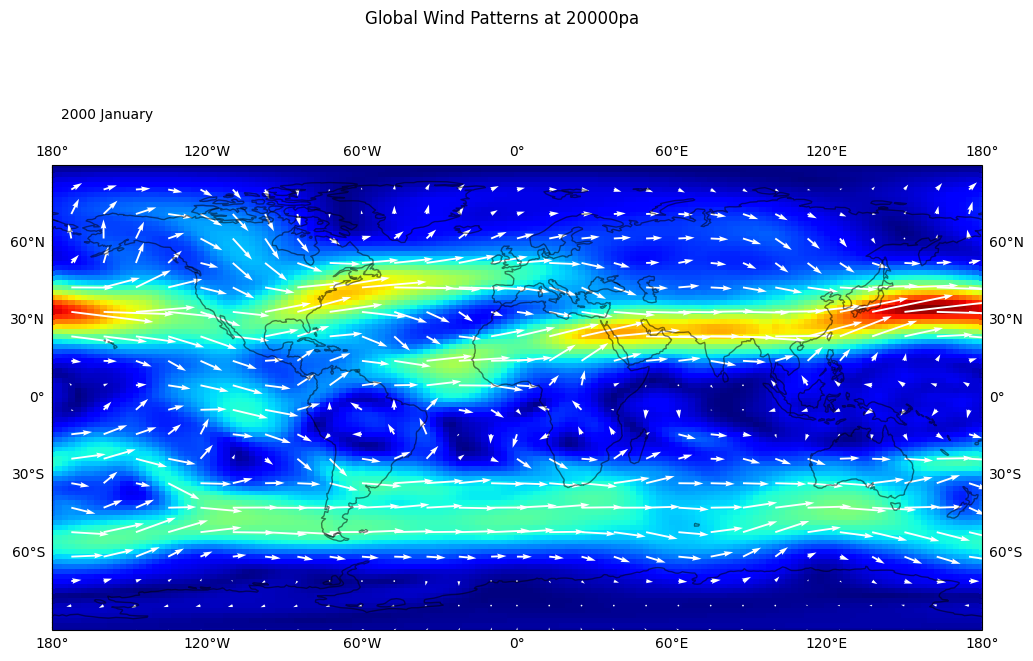

In [79]:
%%time

pressure = 20000
frames = ds_vectors.ua.time.size


fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

fig.suptitle('Global Wind Patterns at %spa' %pressure)

def animate(num):
    ax.clear()
    u = ds_vectors.ua.isel(time=num).sel(plev=pressure)
    v = ds_vectors.va.isel(time=num).sel(plev=pressure)
    
    windspeed = (u**2 + v**2)**0.5
    windspeed.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', add_colorbar=False)

    u = u[::5, ::5]# slicing to get every 5th element
    v = v[::5, ::5]
    
    qv = ax.quiver(u.lon, u.lat, u, v, transform=ccrs.PlateCarree(), scale=800, width=0.002, color='w')
    
    date = dt.strptime(str(ds_vectors.time[num].values), '%Y-%m-%d %H:%M:%S')
    formatted = date.strftime('%Y %B')
    ax.text(0.01, 1.1, formatted, ha='left', transform=ax.transAxes)
    ax.set_title('')
    ax.coastlines(color='k', alpha=0.5)
    ax.gridlines(draw_labels=True, color='none')
    

ani = FuncAnimation(fig, animate, interval=200, frames=frames)
ani.save('wind_qv_background.gif', writer='pillow')

# Using Matplotlib formatting

# Sources

* https://foundations.projectpythia.org
* https://matplotlib.org/stable/users/index.html
* https://matplotlib.org/stable/gallery/index.html
* https://matplotlib.org/stable/gallery/color/named_colors.html
* https://matplotlib.org/stable/users/explain/colors/colormaps.html
* https://matplotlib.org/3.5.0/tutorials/
* https://docs.xarray.dev/en/stable/user-guide/plotting.html
* https://metos-uio.github.io/GEO4962/04-Simple_plot/index.html
* https://www.naturalearthdata.com/downloads/
* https://scitools.org.uk/cartopy/docs/latest/reference/projections.html
* https://scitools.org.uk/cartopy/docs/v0.15/gallery.html
* https://scitools.org.uk/cartopy/docs/latest/reference/index.html
* https://kpegion.github.io/Pangeo-at-AOES/index.html